### Tests for potting

In [1]:
import torch
import os, sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join('..', '..', 'bindsnet')))
sys.path.append(os.path.abspath(os.path.join('..', '..', 'bindsnet', 'network')))
sys.path.append(os.path.abspath(os.path.join('..', '..', 'bindsnet', 'analysis')))

from network     import Network, Monitor
from connections import Connection
from nodes       import McCullochPitts, Input
import plotting as pl
%matplotlib inline


In [2]:
network = Network(dt=1.0)  # Init network with simulation timestep 1
dt = 1.0
n_neurons = 25

# Create layer of `n_neurons` McCulloch-Pitts neurons and add it to the network
mp_layer = McCullochPitts(n=n_neurons, traces=False, threshold=2.0)  
network.add_layer(mp_layer, name='A')
n_input = 25

# Create layer of `n_input` input neurons and add it to the network
input_layer = Input(n=n_input)
network.add_layer(input_layer, name='X')

w = torch.rand(input_layer.n, input_layer.n)  # Create random uniform weight matrix between layers.

# Create connection object from input to MP layer with specified weights.
connection = Connection(input_layer, mp_layer, update_rule=None, w=w)
network.add_connection(connection, source='X', target='A')

voltage_monitor = Monitor(mp_layer, state_vars=['v'])
network.add_monitor(voltage_monitor, name='v_monitor')
time = 100  # Simulation time
p_fire = 0.1  # Bernoulli probability of input neuron spiking

# Input spikes are Bernoulli experiments with spike prob. `p_fire`.
inpt = np.random.binomial(1, p_fire, [time, n_input])
inpt = torch.from_numpy(inpt)

In [3]:
weight_monitor = Monitor(connection, state_vars=['w'])
network.add_monitor(weight_monitor, name='w_monitor')

In [4]:
simulation_time = 100
output = network.run(inpts={'X' : inpt}, time=simulation_time)

dict_keys(['time', 'cmap', 'n_neurons'])


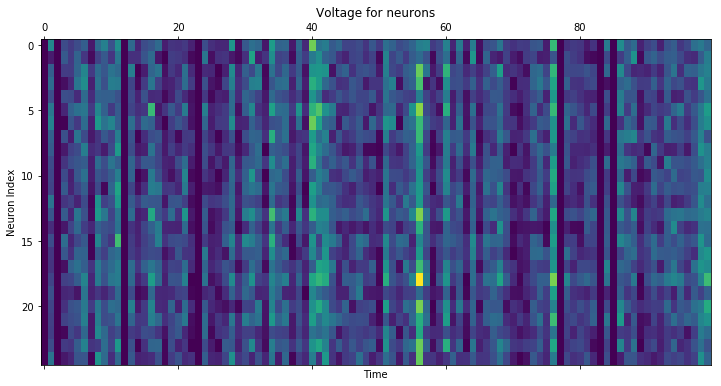

In [5]:
pl.plot_general(voltage_monitor, labels={'v':{'title': 'Voltage for neurons', 'xlabel':'Time', 'ylabel':'Neuron Index'}}\
               ,parameters={'v':{'time':(0, 100), 'cmap':'hot_r'}}, figsize=(12, 6))

### Plot different variables

dict_keys(['n_neurons', 'cmap', 'time'])


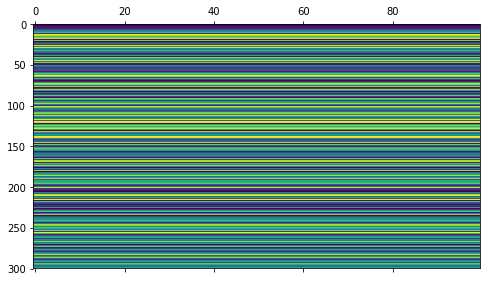

In [9]:
#print (weight_monitor.get('w'))
pl.plot_general(weight_monitor, parameters={'w':{'n_neurons': (0, 300), 'cmap':'hot_r'}})